In [1]:
import time
start_time=time.time()

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate

from astropy.io import fits
import astropy.units as u
from astropy.table import Table

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"
#from sabreMod import sosf,sosfh

In [4]:
damiani_tab1_file = "Obs/J_A+A_591_A74_table1.dat.fits"
tab = Table.read(damiani_tab1_file)
tab

<Table length=866>
              Id               RAdeg     DEdeg   ... [SII]2sigmar   Setup   
                                deg       deg    ...    km / s              
           bytes29            float64   float64  ...   float64     bytes10  
----------------------------- -------- --------- ... ------------ ----------
SKY__10434580-5930497         160.9408 -59.51381 ...        10.02 sky_HR15N 
SKY__10445840-5933062         161.2433 -59.55172 ...         9.21 sky_HR15N 
SKY__10445040-5935467         161.2100 -59.59631 ...        11.27 sky_HR15N 
SKY__10443390-5934549         161.1413 -59.58192 ...        32.56 sky_HR15N 
SKY__10451730-5942205         161.3221 -59.70569 ...        11.96 sky_HR15N 
SKY__10451970-5945404         161.3321 -59.76122 ...         0.00 sky_HR15N 
SKY__10444430-5943333         161.1846 -59.72592 ...        13.01 sky_HR15N 
SKY__10440670-5947505         161.0279 -59.79736 ...         0.00 sky_HR15N 
SKY__10441789-5948152         161.0746 -59.80422 ...         0.00 sky_HR15N 
                          ...      ...       ... ...          ...        ...
2MASS10443101-5942051         161.1292 -59.70144 ...        10.07 star_HR15N
2MASS10442847-5941450         161.1186 -59.69586 ...        13.90 star_HR15N
HSB1210441230-5940553         161.0513 -59.68203 ...        10.13 star_HR15N
2MASS10441079-5940135         161.0450 -59.67042 ...         8.76 star_HR15N
2MASS10434687-5932337         160.9453 -59.54272 ...        11.41 star_HR15N
2MASS10434581-5933267         160.9409 -59.55744 ...        10.64 star_HR15N
HSB1210434260-5932526         160.9275 -59.54794 ...        11.06 star_HR15N
2MASS10433196-5933563         160.8832 -59.56567 ...         0.00 star_HR15N
2MASS10435042-5934005         160.9601 -59.56681 ...        10.09 star_HR15N
2MASS10443989-5938061         161.1662 -59.63503 ...         9.52 star_HR15N

In [5]:
df = tab.to_pandas()
df.describe()

RAdeg       DEdeg           HaNb       HaRVb    Hasigmab  \
count  866.000000  866.000000     866.000000  866.000000  866.000000   
mean   161.161726  -59.654315   62767.252113  -24.714007   15.885924   
std      0.133125    0.080215   54846.830866    8.147913    2.757231   
min    160.768700  -59.891890       0.000000  -51.840000    0.000000   
25%    161.065825  -59.711945   28485.557500  -31.042500   14.320000   
50%    161.155600  -59.657835   46452.860000  -26.800000   15.170000   
75%    161.267100  -59.590390   76666.205000  -19.765000   16.707500   
max    161.472400  -59.494310  483044.020000    0.000000   29.720000   

                HaNr       HaRVr    Hasigmar       [NII]Nb    [NII]RVb  ...  \
count     866.000000  866.000000  866.000000    866.000000  866.000000  ...   
mean    53873.122564    7.306363   16.018268   1631.775751   -8.739353  ...   
std     39423.863415    7.179267    5.690883   3522.508469   12.911389  ...   
min         0.000000  -25.070000    0.000000      0.000000  -44.180000  ...   
25%     24528.595000    3.960000   13.850000      0.000000  -21.497500  ...   
50%     45810.270000    7.635000   14.705000      0.000000    0.000000  ...   
75%     76315.320000   12.702500   16.310000   2243.900000    0.000000  ...   
max    372640.170000   32.650000   84.800000  44719.640000    7.920000  ...   

       [SII]1sigmab      [SII]1Nr   [SII]1RVr  [SII]1sigmar      [SII]2Nb  \
count    866.000000    866.000000  866.000000    866.000000    866.000000   
mean       9.829619   1484.462829    9.367286      8.744284   1270.717298   
std        6.643375   1633.447299    7.761613      6.028452   1931.147707   
min        0.000000      0.000000  -16.630000      0.000000      0.000000   
25%        0.000000      0.000000    0.000000      0.000000      0.000000   
50%       12.010000   1135.875000   10.990000     11.110000    992.800000   
75%       13.950000   2091.252500   15.367500     12.155000   1706.045000   
max       32.200000  12610.120000   54.680000     44.470000  29844.350000   

        [SII]2RVb  [SII]2sigmab      [SII]2Nr   [SII]2RVr  [SII]2sigmar  
count  866.000000    866.000000    866.000000  866.000000    866.000000  
mean   -16.464157      9.631455   1203.455046    8.396328      8.680335  
std     12.642477      6.675027   1461.860496    8.268913      6.144453  
min    -39.300000      0.000000      0.000000  -47.760000      0.000000  
25%    -27.327500      0.000000      0.000000    0.000000      0.000000  
50%    -20.370000     11.700000    865.820000    9.485000     10.915000  
75%      0.000000     13.857500   1642.482500   14.367500     12.087500  
max      2.940000     32.070000  13224.150000   61.700000     43.280000  

[8 rows x 32 columns]

[Text(0.5, 0, 'Velocity')]

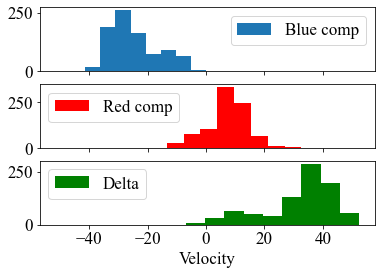

In [6]:
fig, [axb, axr, axd] = plt.subplots(3, 1, sharex=True)
axb.hist(tab["HaRVb"], label='Blue comp')
axr.hist(tab["HaRVr"], color='r', label='Red comp')
axd.hist(tab["HaRVr"] - tab["HaRVb"], color='g', label='Delta')
for ax in axb, axr, axd:
    ax.legend()
axd.set(xlabel='Velocity')

In [7]:
df = df.assign(Ha_dV=df['HaRVr'] - df['HaRVb'])
df = df.assign(Ha_close=(df['Ha_dV'] < 15.0).astype('S5') )
df = df.assign(Ha_rb_ratio=np.log10(df['HaNr']/df['HaNb']))

Blue component

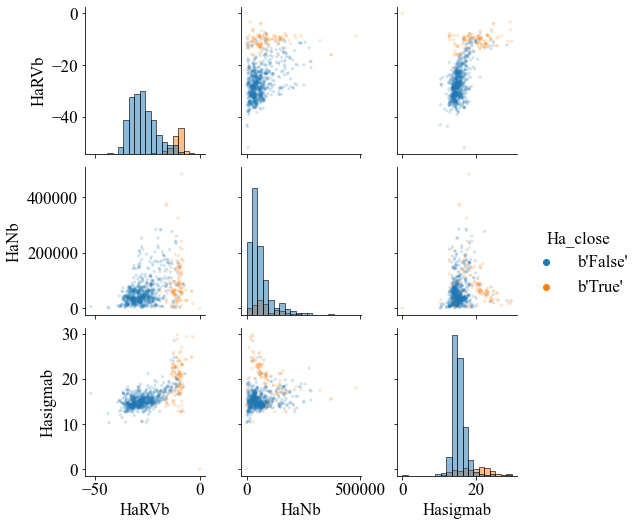

In [8]:
sns.pairplot(df, 
             vars=["HaRVb", "HaNb", "Hasigmab"], 
             diag_kind='hist', hue="Ha_close", 
             plot_kws=dict(alpha=0.2, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

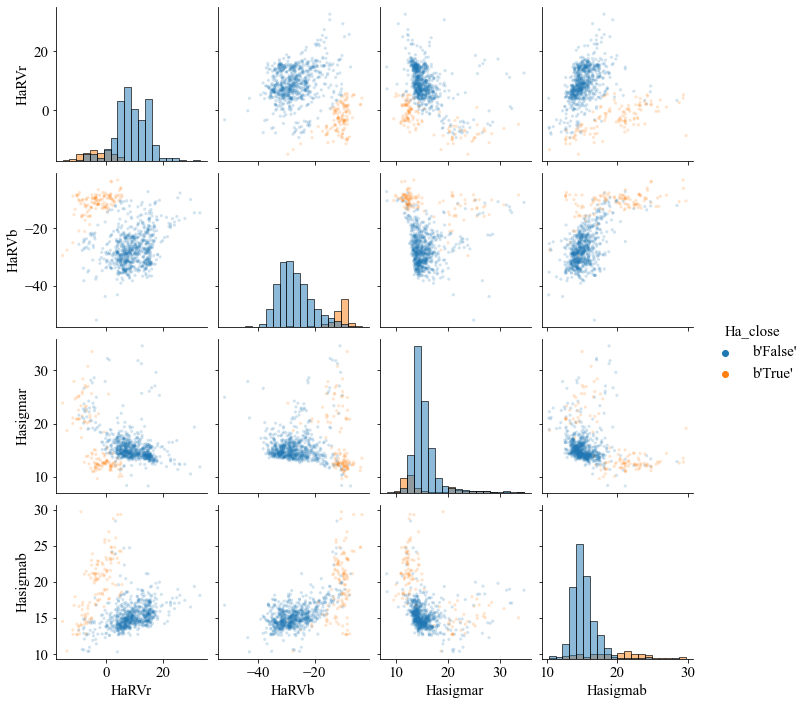

In [106]:
sns.pairplot(df, 
             vars=["HaRVr", "HaRVb", "Hasigmar", "Hasigmab"], 
             diag_kind='hist', hue="Ha_close", 
             plot_kws=dict(alpha=0.2, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


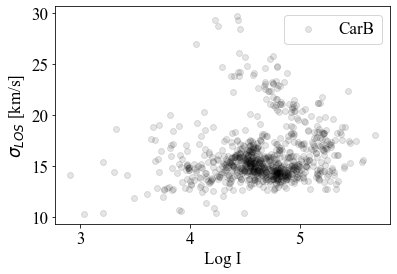

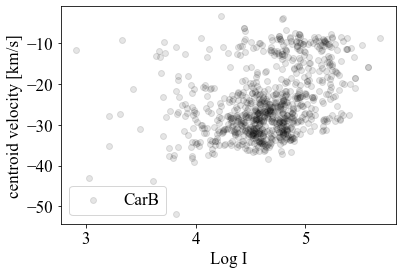

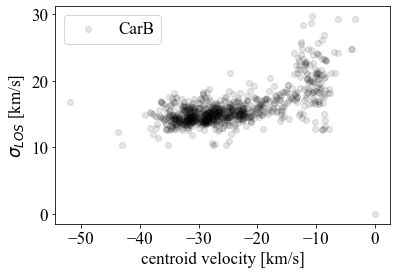

In [9]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.HaRVb, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaBlue.pdf', bbox_inches='tight')

Red Component

In [9]:
mask = df['Hasigmar'] > 35.0
df = df[~mask]

In [11]:
df.dropna(inplace=True)

<ipython-input-11-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


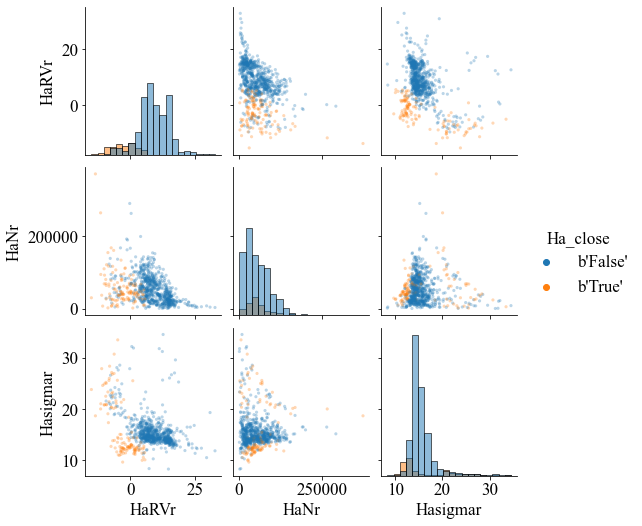

In [12]:
sns.pairplot(df, 
             vars=["HaRVr", "HaNr", "Hasigmar"], 
             diag_kind='hist', hue="Ha_close",
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

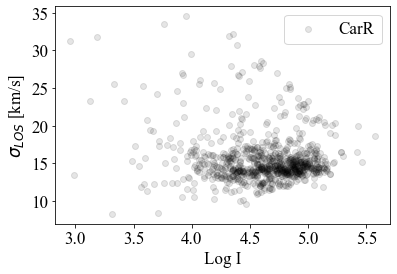

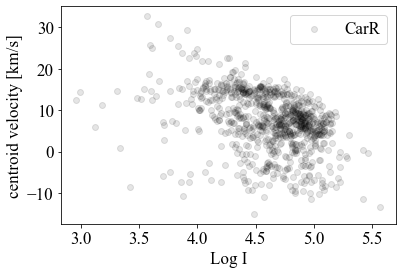

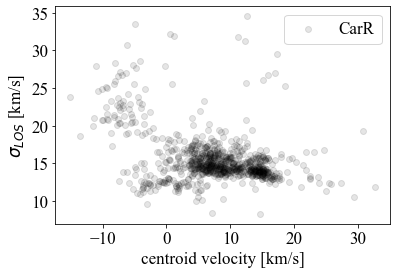

In [13]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')

plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.HaRVr, alpha=0.1, color='k', label='CarR')

plt.legend()

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')

fig, ax = plt.subplots()
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaRed.pdf', bbox_inches='tight')

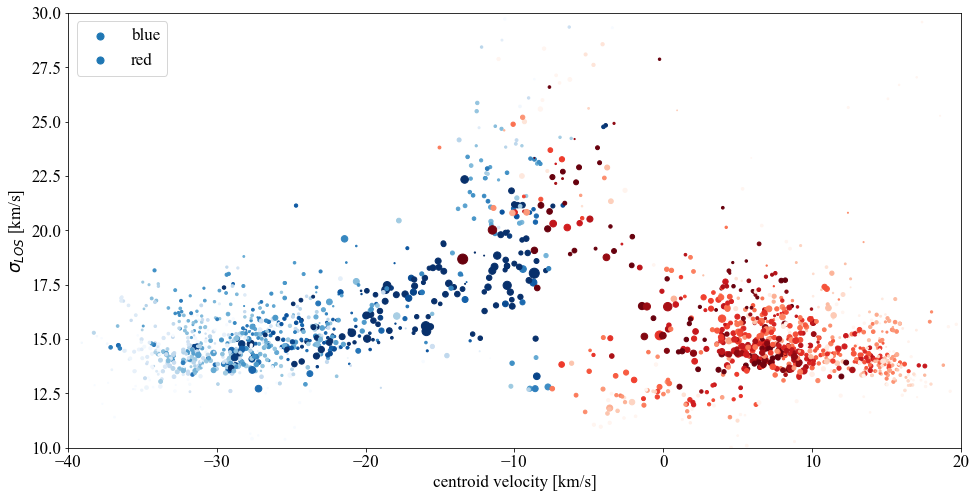

In [132]:
plt.figure(figsize=(16, 8))

plt.subplot(111)
plt.scatter(df.HaRVb,df.Hasigmab, alpha=1.0, s=100*df.HaNb/df.HaNb.max(), 
            c=df.Ha_rb_ratio, label='blue', vmin=-0.5, vmax=0.5, cmap="Blues_r")
plt.scatter(df.HaRVr,df.Hasigmar, alpha=1.0, s=100*df.HaNr/df.HaNr.max(), 
            c=-df.Ha_rb_ratio, label='red', vmin=-0.5, vmax=0.5, cmap="Reds_r")
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.xlim(-40, 20)
plt.ylim(10, 30)
plt.legend()

plt.show()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaLOSvsPOS.pdf', bbox_inches='tight')

Conclusion: the component closer to the systemic velocity tends to be the brightest. 

Combining Components

In [15]:
def combine_moments(f1, v1, s1, f2, v2, s2, return_skew=False):
    """Find combined flux, mean velocity, and sigma for two components 
    with fluxes `f1` and `f2`, velocities `v1` and `v2`, and sigmas `s1` and `s2`. 
    Returns tuple of the combined moments: `f`, `v`, `s`."""
    f = f1 + f2
    v = (v1*f1 + v2*f2)/f
    ss = (s1*s1*f1 + s2*s2*f2)/f
    ss += f1*f2*(v1 - v2)**2 / f**2
    s = np.sqrt(ss)
    if return_skew:
        p1 = f1/f
        p2 = f2/f
        skew = p1*p2*(v1 - v2)*((1 - 2*p1)*(v1 - v2)**2 + 3*(s1**2 - s2**2))
        skew /= (p1*(p2*(v1 - v2)**2 + s1**2 - s2**2) + s2**2)**1.5
#        vmode = np.where(f1 > f2, v1, v2)
#        mskew = (v - vmode)/s
        return f, v, s, skew
    else:
        return f, v, s

In [16]:
fHa, vHa, sHa, gHa = combine_moments(
    df.HaNr, df.HaRVr, df.Hasigmar, 
    df.HaNb, df.HaRVb, df.Hasigmab,
    return_skew=True
)

In [108]:
dfHa = pd.DataFrame(
    {'log_F': np.log10(fHa), 
     'V_mean': vHa,
     "V_r": df.HaRVr,
     "V_b": df.HaRVb,
     'sigma': sHa, 
     'skew': gHa,
     'R_B': df.Ha_rb_ratio,
     'dV': df.Ha_dV,
     'close': df.Ha_close,
     'RAdeg': df.RAdeg,
     'DEdeg': df.DEdeg,
    }
).dropna()

In [109]:
dfHa.describe()

log_F      V_mean         V_r         V_b       sigma        skew  \
count  855.000000  855.000000  855.000000  855.000000  855.000000  855.000000   
mean     4.980402   -8.830675    7.355216  -24.905801   22.468922   -0.031035   
std      0.302783    4.229329    7.084257    8.011917    2.730988    0.306038   
min      3.413632  -22.703236  -15.040000  -51.840000   15.856762   -0.802990   
25%      4.827033  -11.433731    3.960000  -31.075000   20.525060   -0.248047   
50%      5.021479   -8.695479    7.640000  -26.930000   22.423762   -0.047386   
75%      5.180976   -5.994656   12.720000  -20.365000   24.173194    0.187720   
max      5.706532    2.921228   32.650000   -3.420000   31.576729    0.857175   

              R_B          dV       RAdeg       DEdeg  
count  855.000000  855.000000  855.000000  855.000000  
mean    -0.040272   32.261018  161.162622  -59.654128  
std      0.436005   11.880264    0.132337    0.080008  
min     -1.652288   -2.440000  160.768700  -59.891890  
25%     -0.272299   28.805000  161.068450  -59.712000  
50%      0.006337   35.580000  161.157600  -59.658080  
75%      0.248846   40.410000  161.267100  -59.589670  
max      1.441905   52.510000  161.472400  -59.494310

Maps

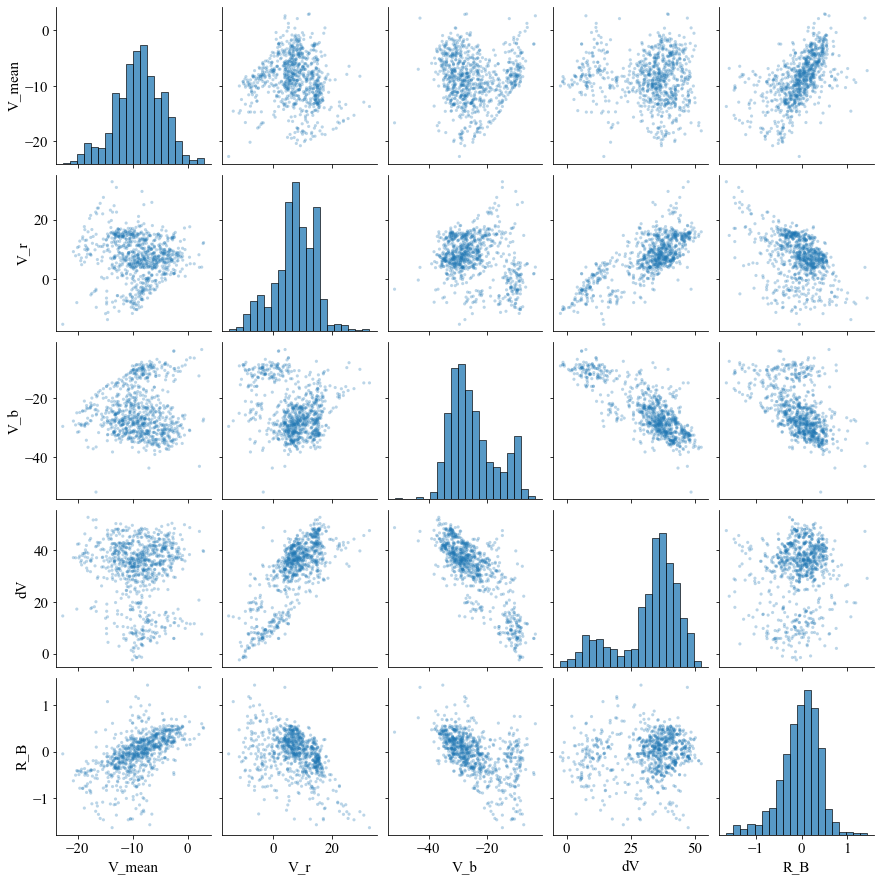

In [117]:
sns.pairplot(dfHa, 
             vars=["V_mean", "V_r", "V_b", "dV", "R_B"], 
             diag_kind='hist', #hue="R_B",
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [114]:
dfHa.corr()

log_F    V_mean       V_r       V_b     sigma      skew       R_B  \
log_F   1.000000 -0.106353 -0.154798  0.136420 -0.328498 -0.058426 -0.143226   
V_mean -0.106353  1.000000 -0.089518  0.008498  0.011430 -0.859559  0.566282   
V_r    -0.154798 -0.089518  1.000000 -0.235763  0.507465  0.198441 -0.392043   
V_b     0.136420  0.008498 -0.235763  1.000000 -0.734709  0.117773 -0.535840   
sigma  -0.328498  0.011430  0.507465 -0.734709  1.000000 -0.036417  0.251887   
skew   -0.058426 -0.859559  0.198441  0.117773 -0.036417  1.000000 -0.600658   
R_B    -0.143226  0.566282 -0.392043 -0.535840  0.251887 -0.600658  1.000000   
dV     -0.184307 -0.059111  0.755301 -0.814976  0.798083  0.038907  0.127587   
RAdeg  -0.191434 -0.097546  0.283783 -0.377959  0.464444  0.090657  0.080397   
DEdeg   0.317267  0.229166 -0.300607  0.365685 -0.458253 -0.278571  0.034761   

              dV     RAdeg     DEdeg  
log_F  -0.184307 -0.191434  0.317267  
V_mean -0.059111 -0.097546  0.229166  
V_r     0.755301  0.283783 -0.300607  
V_b    -0.814976 -0.377959  0.365685  
sigma   0.798083  0.464444 -0.458253  
skew    0.038907  0.090657 -0.278571  
R_B     0.127587  0.080397  0.034761  
dV      1.000000  0.424113 -0.425867  
RAdeg   0.424113  1.000000 -0.169309  
DEdeg  -0.425867 -0.169309  1.000000

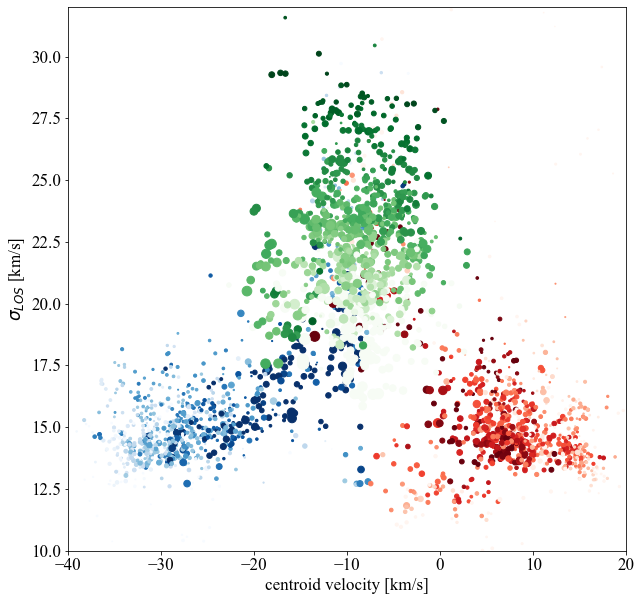

In [155]:
plt.figure(figsize=(10, 10))

plt.subplot(111)
plt.scatter(df.HaRVb,df.Hasigmab, alpha=1.0, s=100*df.HaNb/df.HaNb.max(), 
            c=df.Ha_rb_ratio, vmin=-0.5, vmax=0.5, cmap="Blues_r")
plt.scatter(df.HaRVr,df.Hasigmar, alpha=1.0, s=100*df.HaNr/df.HaNr.max(), 
            c=-df.Ha_rb_ratio, vmin=-0.5, vmax=0.5, cmap="Reds_r")
plt.scatter(dfHa.V_mean, dfHa.sigma, alpha=1.0, s=30*10**(dfHa.log_F - 5.0), 
            c=dfHa.dV, vmin=20, vmax=50, cmap="Greens")
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.xlim(-40, 20)
plt.ylim(10, 32)
plt.show()

plt.rcParams["font.size"]="17"



In [19]:
points_of_interest = {
    "eta Car": [161.26517, -59.684425],
    "Tr 14": [160.98911, -59.547698],
    "WR 25": [161.0433, -59.719735],
    "Finger": [161.13133, -59.664035],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

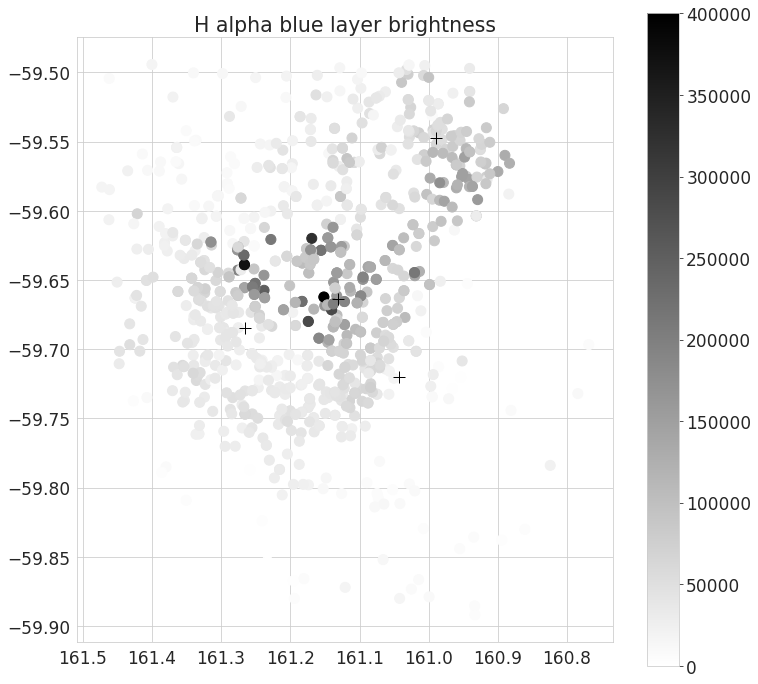

In [20]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNb, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha blue layer brightness')

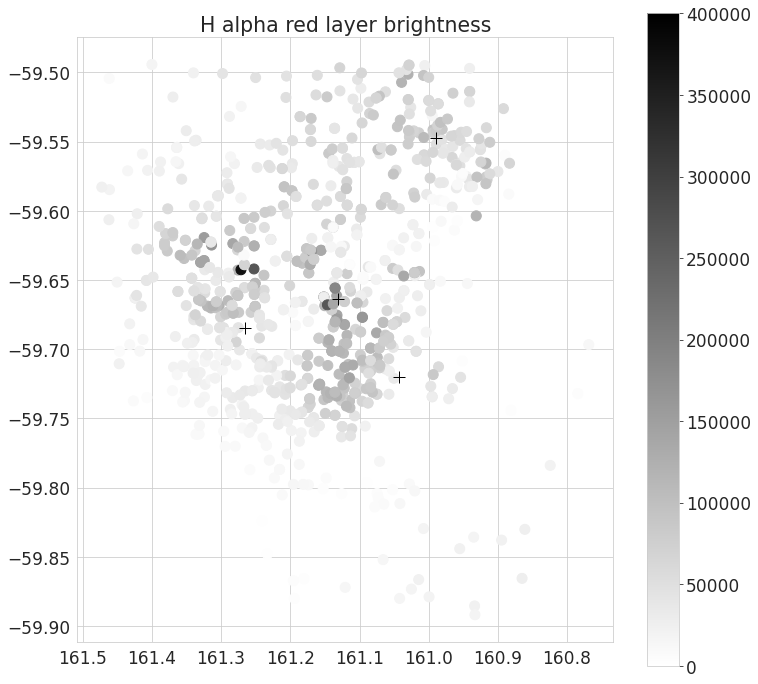

In [21]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNr, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha red layer brightness')

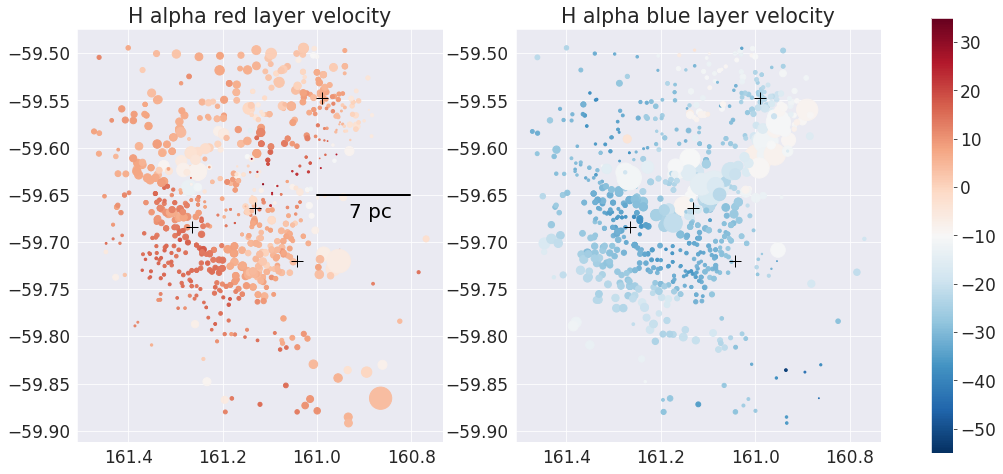

In [153]:
with sns.axes_style("darkgrid"):
    fig, [axr, axb] = plt.subplots(1, 2, figsize=(18, 8))
    scat = axr.scatter(df.RAdeg, df.DEdeg, 
#                      s=40*(np.log10(df.HaNr/df.HaNb) + 1.3), 
                      s=20*(df.HaNr/df.HaNb), 
                      c=df.HaRVr, cmap='RdBu_r',
                      vmin=-55, vmax=35, 
                     )
    
    axr.text(0.53, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    axr.axhline(y=-59.65, xmin=0.655, xmax=0.91, linewidth=2, color = 'k')
    
    scat = axb.scatter(df.RAdeg, df.DEdeg, 
#                      s=40*(np.log10(df.HaNb/df.HaNr) + 1.3), 
                      s=20*(df.HaNb/df.HaNr), 
                      c=df.HaRVb, cmap='RdBu_r',
                      vmin=-55, vmax=35,
                     )
    
#    scat2 = ax.scatter(df.RAdeg, df.DEdeg, 
#                      s=50*(np.log10(df.HaNr) - 3), 
#                      c=df.HaRVr, cmap='RdBu_r',
#                      vmin=-55, vmax=35, marker='+',
#                     )
    fig.colorbar(scat, ax=[axr, axb])
    mark_points(axr)
    mark_points(axb)
    axr.invert_xaxis()
    axr.set_aspect(2.0)
    axb.invert_xaxis()
    axb.set_aspect(2.0)  
    axr.set_title('H alpha red layer velocity')
    axb.set_title('H alpha blue layer velocity')

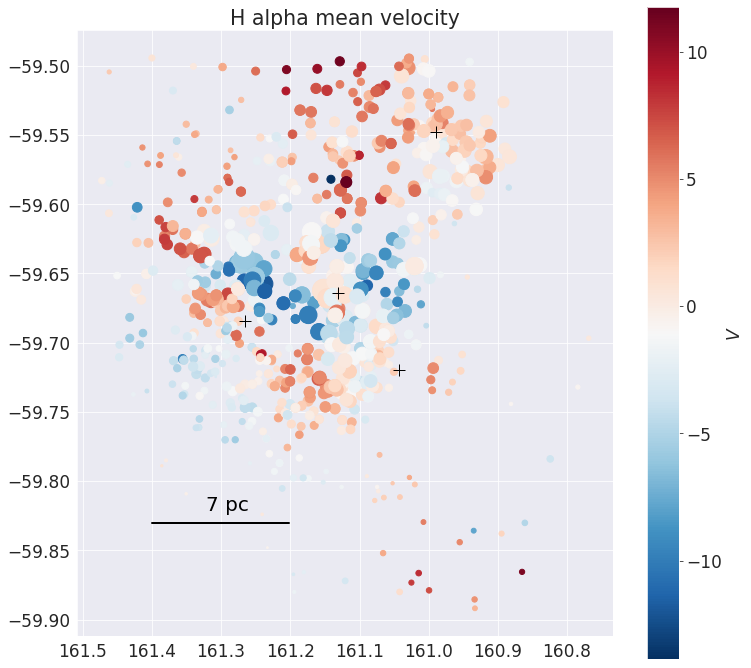

In [154]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(dfHa.RAdeg, dfHa.DEdeg, 
                      s=100*10**(dfHa.log_F - 5.0), 
                      c=dfHa.V_mean-dfHa.V_mean.mean(), cmap='RdBu_r')
    mark_points(ax)
    fig.colorbar(scat, ax=ax).set_label("$V$")
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title("H alpha mean velocity")
    
    ax.text(0.32, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    ax.axhline(y=-59.83, xmin=0.14, xmax=0.395, linewidth=2, color = 'k')

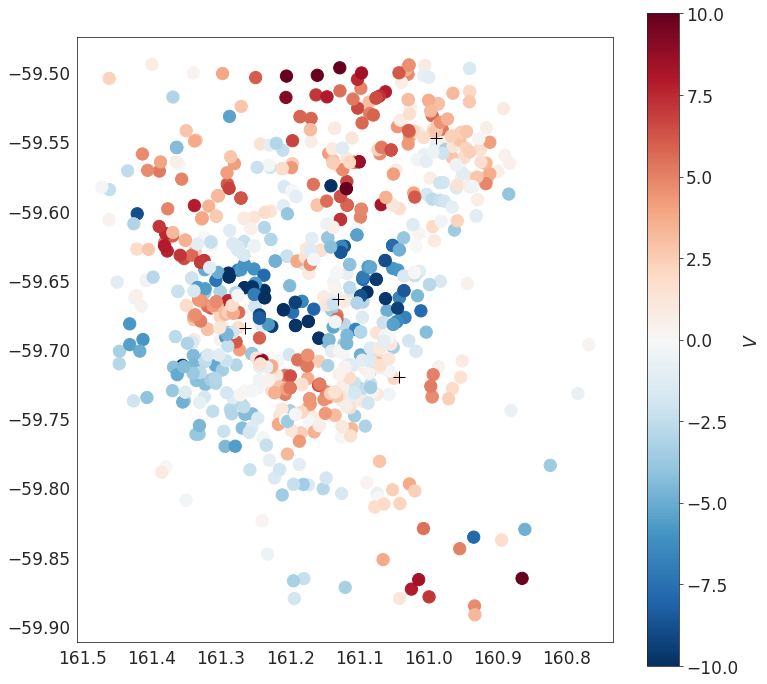

In [159]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(dfHa.RAdeg, dfHa.DEdeg, 
                      s=150,
                      vmin=-10, vmax=10,
                      c=dfHa.V_mean-dfHa.V_mean.mean(), cmap='RdBu_r')
    mark_points(ax)
    fig.colorbar(scat, ax=ax).set_label("$V$")
    ax.invert_xaxis()
    ax.set_aspect(2)
#    ax.set_title("H alpha mean velocity")
    


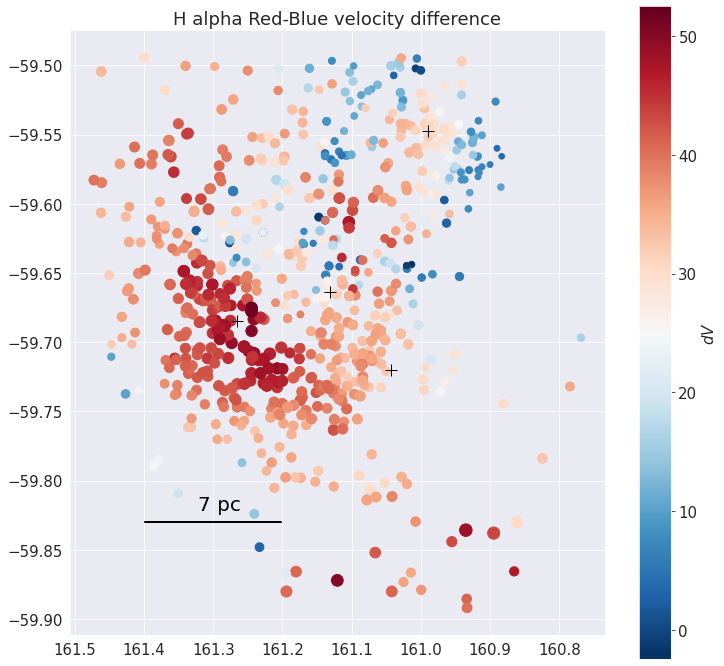

In [107]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(
        dfHa.RAdeg, dfHa.DEdeg, 
        s=8*(dfHa.sigma - 12), c=dfHa.dV, cmap='RdBu_r')
    mark_points(ax)
    fig.colorbar(scat, ax=ax).set_label("$dV$")
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title("H alpha Red-Blue velocity difference")
    
    ax.text(0.32, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    ax.axhline(y=-59.83, xmin=0.14, xmax=0.395, linewidth=2, color = 'k')

In [24]:
dfHa.V_mean-dfHa.V_mean.mean()

0       1.655131
1       1.439015
2      -1.063270
3     -13.872561
4      -3.656422
         ...    
861     2.400260
862     0.135196
863     0.510771
864    -0.478380
865    -0.171239
Name: V_mean, Length: 855, dtype: float64

Structure Fucntion

Dr. Will Blue

In [25]:
df2 = df[['RAdeg', 'DEdeg', 'HaRVb']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVb' : 'RV'}, inplace = True)
df2.describe()

X           Y          RV
count  855.000000  855.000000  855.000000
mean   161.162622  -59.654128  -24.905801
std      0.132337    0.080008    8.011917
min    160.768700  -59.891890  -51.840000
25%    161.068450  -59.712000  -31.075000
50%    161.157600  -59.658080  -26.930000
75%    161.267100  -59.589670  -20.365000
max    161.472400  -59.494310   -3.420000

In [26]:
df1 = pd.DataFrame(
    {'RA': df2.X, 'DE': df2.Y, 'V':df2.RV, '_key': 1}
)

In [27]:
df1.describe()

RA          DE           V   _key
count  855.000000  855.000000  855.000000  855.0
mean   161.162622  -59.654128  -24.905801    1.0
std      0.132337    0.080008    8.011917    0.0
min    160.768700  -59.891890  -51.840000    1.0
25%    161.068450  -59.712000  -31.075000    1.0
50%    161.157600  -59.658080  -26.930000    1.0
75%    161.267100  -59.589670  -20.365000    1.0
max    161.472400  -59.494310   -3.420000    1.0

In [28]:
df2 = df1.copy()

In [38]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE      V       RA_       DE_     V_
0 0  160.9408 -59.51381 -23.61  160.9408 -59.51381 -23.61
  1  160.9408 -59.51381 -23.61  161.2433 -59.55172 -31.12
  2  160.9408 -59.51381 -23.61  161.2100 -59.59631 -28.47
  3  160.9408 -59.51381 -23.61  161.1413 -59.58192 -29.53
  4  160.9408 -59.51381 -23.61  161.3221 -59.70569 -28.25

In [39]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
pairs = pairs[(pairs.dRA > 0.0)]
#pairs = pairs[(pairs.dDE > 0.0)]

In [41]:
pairs.head()

RA        DE      V       RA_       DE_     V_      dDE  \
0 11  160.9408 -59.51381 -23.61  160.9254 -59.55578 -13.00  151.092   
  25  160.9408 -59.51381 -23.61  160.9183 -59.56622 -11.58  188.676   
  54  160.9408 -59.51381 -23.61  160.9254 -59.55578 -12.94  151.092   
  55  160.9408 -59.51381 -23.61  160.9000 -59.57164  -9.60  208.188   
  84  160.9408 -59.51381 -23.61  160.9233 -59.55178 -12.78  136.692   

            dRA           s     log_s     dV       dV2   log_dV2  VV_mean  
0 11  28.108912  153.684428  2.186630 -10.61  112.5721  2.051431  -18.305  
  25  41.061855  193.092488  2.285765 -12.03  144.7209  2.160531  -17.595  
  54  28.108912  153.684428  2.186630 -10.67  113.8489  2.056329  -18.275  
  55  74.452842  221.100586  2.344590 -14.01  196.2801  2.292876  -16.605  
  84  31.943841  140.374898  2.147289 -10.83  117.2889  2.069257  -18.195

In [42]:
pairs.describe()

RA             DE              V            RA_  \
count  364720.000000  364720.000000  364720.000000  364720.000000   
mean      161.238471     -59.662496     -26.671094     161.086773   
std         0.107548       0.071228       7.050242       0.109202   
min       160.784500     -59.891890     -51.840000     160.768700   
25%       161.157600     -59.712970     -31.730000     161.003800   
50%       161.250800     -59.665580     -28.280000     161.087400   
75%       161.322900     -59.618170     -23.290000     161.157600   
max       161.472400     -59.494310      -3.420000     161.462100   

                 DE_             V_            dDE            dRA  \
count  364720.000000  364720.000000  364720.000000  364720.000000   
mean      -59.645761     -23.140537     -60.246444     275.941897   
std         0.087053       8.502895     403.020772     199.728416   
min       -59.891890     -51.840000   -1387.404000       0.181264   
25%       -59.710580     -29.290000    -347.508000     113.019228   
50%       -59.644890     -24.870000     -65.376000     240.057686   
75%       -59.567170     -15.860000     207.900000     401.552087   
max       -59.494310      -3.420000    1431.288000    1280.427149   

                   s          log_s             dV            dV2  \
count  364720.000000  364720.000000  364720.000000  364720.000000   
mean      470.071329       2.596000      -3.530558     128.470161   
std       247.231280       0.286791      10.770592     172.356919   
min         0.211978      -0.673709     -44.140000       0.000000   
25%       281.045248       2.448776     -10.880000       9.985600   
50%       442.719937       2.646129      -3.100000      50.552100   
75%       634.416681       2.802375       3.240000     185.776900   
max      1693.387954       3.228756      48.420000    2344.496400   

            log_dV2        VV_mean  
count  3.647200e+05  364720.000000  
mean           -inf     -24.905816  
std             NaN       5.656957  
min            -inf     -47.760000  
25%    9.993742e-01     -29.245000  
50%    1.703739e+00     -25.640000  
75%    2.268992e+00     -20.905000  
max    3.370050e+00      -3.645000

In [43]:
pairs.corr()

RA        DE         V       RA_       DE_        V_       dDE  \
RA       1.000000  0.001873 -0.253319  0.487159 -0.122557 -0.176843  0.096493   
DE       0.001873  1.000000  0.110301 -0.014521  0.009581  0.009651  0.628794   
V       -0.253319  0.110301  1.000000 -0.135699  0.037161  0.050040  0.041282   
RA_      0.487159 -0.014521 -0.135699  1.000000 -0.244562 -0.367049  0.180934   
DE_     -0.122557  0.009581  0.037161 -0.244562  1.000000  0.517920 -0.771512   
V_      -0.176843  0.009651  0.050040 -0.367049  0.517920  1.000000 -0.396598   
dDE      0.096493  0.628794  0.041282  0.180934 -0.771512 -0.396598  1.000000   
dRA      0.494955  0.017614 -0.113202 -0.517712  0.125145  0.192925 -0.086107   
s        0.192221 -0.083373 -0.026019 -0.437966  0.105171  0.163813 -0.134827   
log_s    0.217271 -0.059095 -0.039109 -0.391443  0.110026  0.168163 -0.123157   
dV      -0.026209  0.064582  0.615079  0.200943 -0.384550 -0.756700  0.340119   
dV2     -0.082961  0.040285 -0.009665 -0.215668  0.192172  0.442168 -0.123804   
log_dV2 -0.071543 -0.005231  0.028986 -0.188296  0.167053  0.383477 -0.133232   
VV_mean -0.290761  0.075987  0.660755 -0.360414  0.412396  0.782725 -0.272336   

              dRA         s     log_s        dV       dV2   log_dV2   VV_mean  
RA       0.494955  0.192221  0.217271 -0.026209 -0.082961 -0.071543 -0.290761  
DE       0.017614 -0.083373 -0.059095  0.064582  0.040285 -0.005231  0.075987  
V       -0.113202 -0.026019 -0.039109  0.615079 -0.009665  0.028986  0.660755  
RA_     -0.517712 -0.437966 -0.391443  0.200943 -0.215668 -0.188296 -0.360414  
DE_      0.125145  0.105171  0.110026 -0.384550  0.192172  0.167053  0.412396  
V_       0.192925  0.163813  0.168163 -0.756700  0.442168  0.383477  0.782725  
dDE     -0.086107 -0.134827 -0.123157  0.340119 -0.123804 -0.133232 -0.272336  
dRA      1.000000  0.623908  0.602216 -0.226406  0.133734  0.117566  0.074450  
s        0.623908  1.000000  0.915821 -0.146355  0.208154  0.173294  0.106899  
log_s    0.602216  0.915821  1.000000 -0.158357  0.209769  0.198123  0.102011  
dV      -0.226406 -0.146355 -0.158357  1.000000 -0.355399 -0.283721 -0.185408  
dV2      0.133734  0.208154  0.209769 -0.355399  1.000000  0.680797  0.326286  
log_dV2  0.117566  0.173294  0.198123 -0.283721  0.680797  1.000000  0.306308  
VV_mean  0.074450  0.106899  0.102011 -0.185408  0.326286  0.306308  1.000000

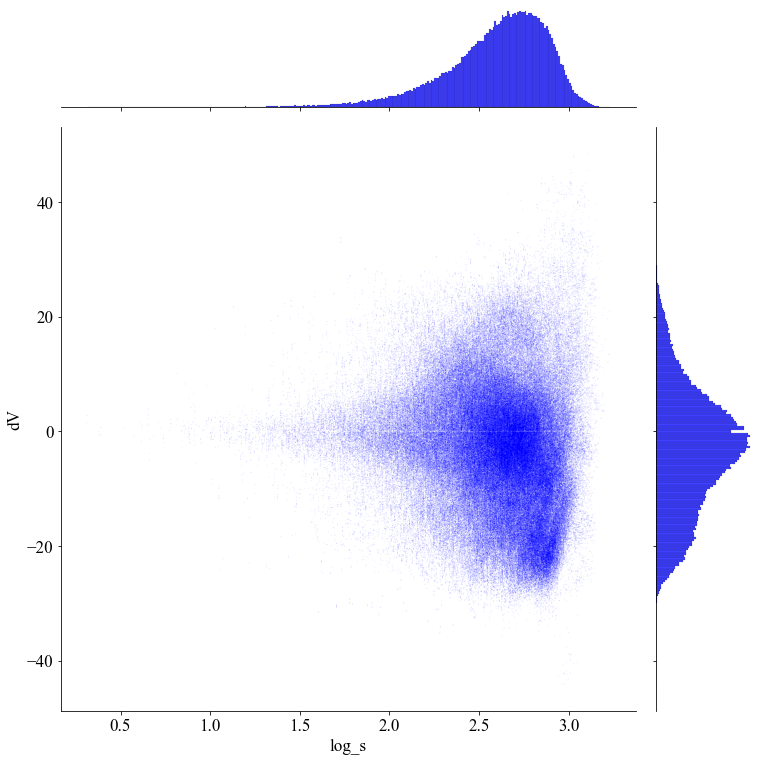

In [45]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

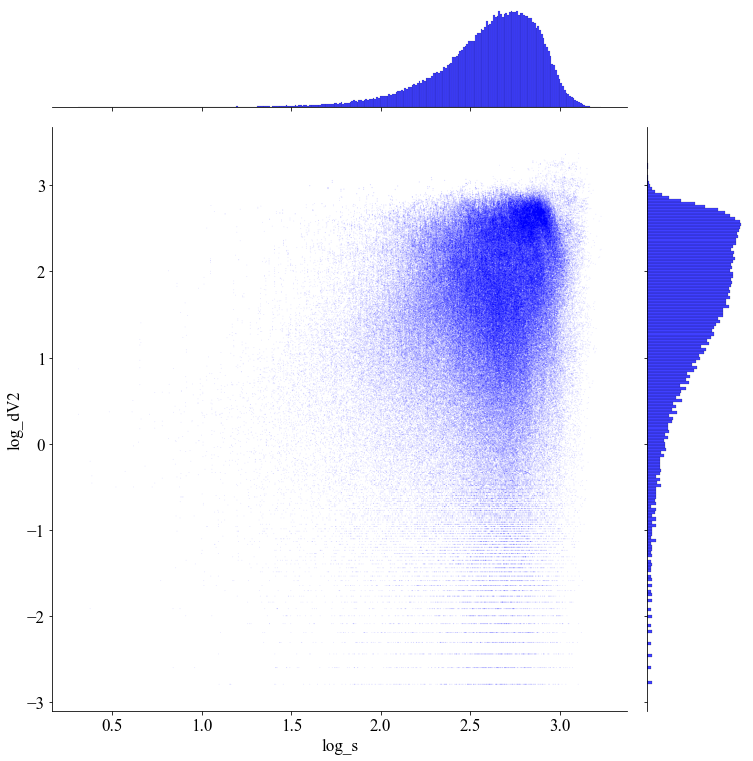

In [46]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [47]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [48]:
pairs.s_class[pairs.s_class == 0] = 1

In [49]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  33.000000  33.000000
mean    3.911418   0.524954
std     5.865604   0.306120
min     0.000100  -0.673709
25%     0.422500   0.484991
50%     1.512900   0.647798
75%     3.920400   0.660887
max    25.300900   0.738386

s_class = 2
              dV2       log_s
count  392.000000  392.000000
mean    18.267014    1.087589
std     67.017597    0.121838
min      0.000000    0.771166
25%      0.432325    1.007285
50%      1.795600    1.109504
75%      4.984075    1.195605
max    583.705600    1.247894

s_class = 3
               dV2        log_s
count  4426.000000  4426.000000
mean     30.329078     1.586794
std      86.947334     0.127012
min       0.000000     1.250281
25%       1.020100     1.497525
50%       5.062500     1.616207
75%      18.041275     1.694209
max    1

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


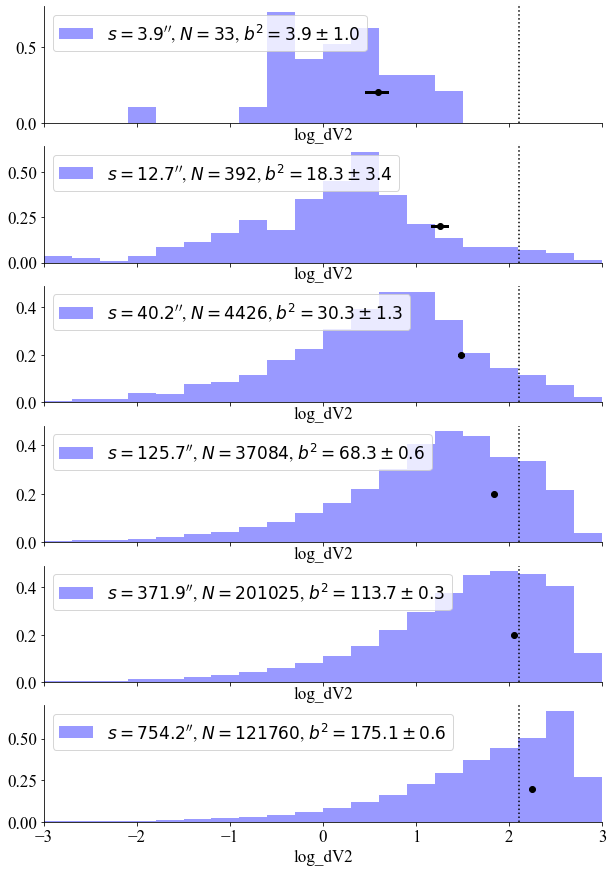

In [50]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [51]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 128.23


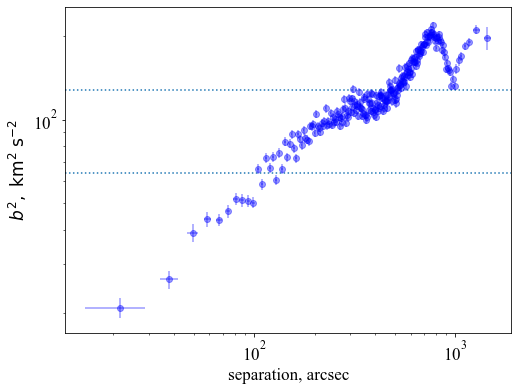

In [52]:
ngroup = 1500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [53]:
d_log_s = 0.2
#log_s_min = np.min(pairs["log_s"])
log_s_min = 1.0
ils = ((pairs["log_s"] - log_s_min) / d_log_s).astype(int).rename("ils")
ils[ils < 0] = 0
ils

0    11     5
     25     6
     54     5
     55     6
     84     5
           ..
865  860    8
     861    8
     862    8
     863    8
     864    8
Name: ils, Length: 364720, dtype: int64

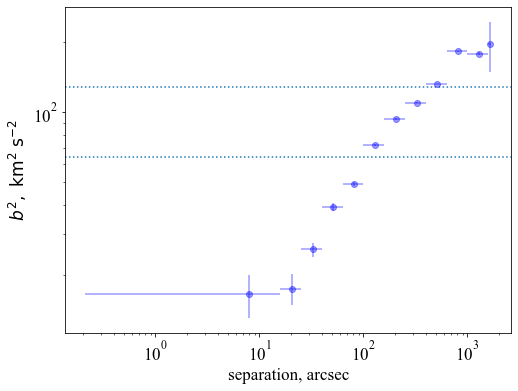

In [54]:
table = pairs[['s', 'dV2']].groupby(ils).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [76]:
pc1=0.011

In [45]:
table=[s*pc1,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//CarB2.csv',mode = 'w', index=False)

Red Dr. Will

In [55]:
df3 = df[['RAdeg', 'DEdeg', 'HaRVr']].copy()
df3.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVr' : 'RV'}, inplace = True)
df3.describe()

X           Y          RV
count  855.000000  855.000000  855.000000
mean   161.162622  -59.654128    7.355216
std      0.132337    0.080008    7.084257
min    160.768700  -59.891890  -15.040000
25%    161.068450  -59.712000    3.960000
50%    161.157600  -59.658080    7.640000
75%    161.267100  -59.589670   12.720000
max    161.472400  -59.494310   32.650000

In [56]:
df1 = pd.DataFrame(
    {'RA': df3.X, 'DE': df3.Y, 'V':df3.RV, '_key': 1}
)

In [48]:
df1.describe()

RA          DE           V   _key
count  855.000000  855.000000  855.000000  855.0
mean   161.162622  -59.654128    7.355216    1.0
std      0.132337    0.080008    7.084257    0.0
min    160.768700  -59.891890  -15.040000    1.0
25%    161.068450  -59.712000    3.960000    1.0
50%    161.157600  -59.658080    7.640000    1.0
75%    161.267100  -59.589670   12.720000    1.0
max    161.472400  -59.494310   32.650000    1.0

In [58]:
df2 = df1.copy()

In [59]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_     V_
0 0  160.9408 -59.51381  4.94  160.9408 -59.51381   4.94
  1  160.9408 -59.51381  4.94  161.2433 -59.55172   5.23
  2  160.9408 -59.51381  4.94  161.2100 -59.59631  -0.09
  3  160.9408 -59.51381  4.94  161.1413 -59.58192 -15.04
  4  160.9408 -59.51381  4.94  161.3221 -59.70569  14.37

In [60]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
pairs = pairs[(pairs.dDE > 0.0)]

In [62]:
pairs.head()

RA        DE     V       RA_       DE_     V_      dDE         dRA  \
0 1  160.9408 -59.51381  4.94  161.2433 -59.55172   5.23  136.476 -552.172605   
  2  160.9408 -59.51381  4.94  161.2100 -59.59631  -0.09  297.000 -491.062913   
  3  160.9408 -59.51381  4.94  161.1413 -59.58192 -15.04  245.196 -365.821506   
  4  160.9408 -59.51381  4.94  161.3221 -59.70569  14.37  690.768 -694.420944   
  5  160.9408 -59.51381  4.94  161.3321 -59.76122  11.42  890.676 -712.043953   

               s     log_s     dV       dV2   log_dV2  VV_mean  
0 1   568.788436  2.754951  -0.29    0.0841 -1.075204    5.085  
  2   573.891788  2.758830   5.03   25.3009  1.403136    2.425  
  3   440.393520  2.643841  19.98  399.2004  2.601191   -5.050  
  4   979.479901  2.990996  -9.43   88.9249  1.949023    9.655  
  5  1140.311505  3.057024  -6.48   41.9904  1.623150    8.180

In [63]:
pairs.describe()

RA             DE              V            RA_  \
count  364822.000000  364822.000000  364822.000000  364822.000000   
mean      161.147930     -59.608620       6.046539     161.177299   
std         0.139652       0.064388       7.201130       0.122715   
min       160.768700     -59.885500     -15.040000     160.768700   
25%       161.029800     -59.658080       1.750000     161.095500   
50%       161.136100     -59.605140       6.560000     161.174200   
75%       161.266300     -59.555830      10.220000     161.271300   
max       161.472400     -59.494310      32.650000     161.472400   

                 DE_             V_            dDE            dRA  \
count  364822.000000  364822.000000  364822.000000  364822.000000   
mean      -59.699642       8.663130     327.681923     -53.545434   
std         0.067106       6.706196     242.207180     336.339063   
min       -59.891890     -15.040000       0.072000   -1232.407354   
25%       -59.737310       5.240000     131.184000    -291.428857   
50%       -59.704140       9.090000     281.412000     -56.244477   
75%       -59.658080      13.960000     480.204000     179.184622   
max       -59.494720      32.650000    1431.288000    1280.427149   

                   s          log_s             dV            dV2  \
count  364822.000000  364822.000000  364822.000000  364822.000000   
mean      469.992534       2.595859      -2.616590     100.419322   
std       247.260094       0.286951       9.673316     148.016677   
min         0.211978      -0.673709     -47.690000       0.000000   
25%       280.941624       2.448616      -8.790000       8.468100   
50%       442.651348       2.646062      -2.620000      42.640900   
75%       634.346386       2.802326       3.280000     127.012900   
max      1693.387954       3.228756      46.130000    2274.336100   

            log_dV2        VV_mean  
count  3.648220e+05  364822.000000  
mean           -inf       7.354835  
std             NaN       5.002141  
min            -inf     -14.260000  
25%    9.277860e-01       4.165000  
50%    1.629826e+00       7.650000  
75%    2.103848e+00      10.765000  
max    3.356855e+00      31.695000

In [64]:
pairs.corr()

RA        DE         V       RA_       DE_        V_       dDE  \
RA       1.000000 -0.317070  0.219679  0.010986 -0.141523  0.040870 -0.162283   
DE      -0.317070  1.000000 -0.298003 -0.000495  0.477044 -0.115837  0.481199   
V        0.219679 -0.298003  1.000000 -0.000817 -0.141723  0.033715 -0.143836   
RA_      0.010986 -0.000495 -0.000817  1.000000  0.073618  0.330769 -0.073901   
DE_     -0.141523  0.477044 -0.141723  0.073618  1.000000 -0.184816 -0.540883   
V_       0.040870 -0.115837  0.033715  0.330769 -0.184816  1.000000  0.073482   
dDE     -0.162283  0.481199 -0.143836 -0.073901 -0.540883  0.073482  1.000000   
dRA      0.748079 -0.239213  0.166395 -0.655349 -0.155640 -0.188488 -0.073692   
s       -0.194392  0.447700 -0.131256  0.000103 -0.381572  0.024560  0.809042   
log_s   -0.156970  0.414585 -0.120538  0.020902 -0.317697  0.025454  0.713640   
dV       0.135202 -0.141538  0.721059 -0.229919  0.022624 -0.668169 -0.158019   
dV2     -0.130408  0.035139 -0.286041  0.008722  0.031178  0.082199  0.002530   
log_dV2 -0.138887  0.071145 -0.256414  0.019796  0.015579  0.042560  0.052545   
VV_mean  0.185522 -0.292153  0.742405  0.221137 -0.225901  0.694601 -0.054276   

              dRA         s     log_s        dV       dV2   log_dV2   VV_mean  
RA       0.748079 -0.194392 -0.156970  0.135202 -0.130408 -0.138887  0.185522  
DE      -0.239213  0.447700  0.414585 -0.141538  0.035139  0.071145 -0.292153  
V        0.166395 -0.131256 -0.120538  0.721059 -0.286041 -0.256414  0.742405  
RA_     -0.655349  0.000103  0.020902 -0.229919  0.008722  0.019796  0.221137  
DE_     -0.155640 -0.381572 -0.317697  0.022624  0.031178  0.015579 -0.225901  
V_      -0.188488  0.024560  0.025454 -0.668169  0.082199  0.042560  0.694601  
dDE     -0.073692  0.809042  0.713640 -0.158019  0.002530  0.052545 -0.054276  
dRA      1.000000 -0.147257 -0.132739  0.254542 -0.104177 -0.117945 -0.006578  
s       -0.147257  1.000000  0.915768 -0.114738  0.031844  0.093513 -0.078015  
log_s   -0.132739  0.915768  1.000000 -0.107379  0.054822  0.130307 -0.069702  
dV       0.254542 -0.114738 -0.107379  1.000000 -0.269925 -0.220361  0.071126  
dV2     -0.104177  0.031844  0.054822 -0.269925  1.000000  0.634691 -0.150793  
log_dV2 -0.117945  0.093513  0.130307 -0.220361  0.634691  1.000000 -0.156055  
VV_mean -0.006578 -0.078015 -0.069702  0.071126 -0.150793 -0.156055  1.000000

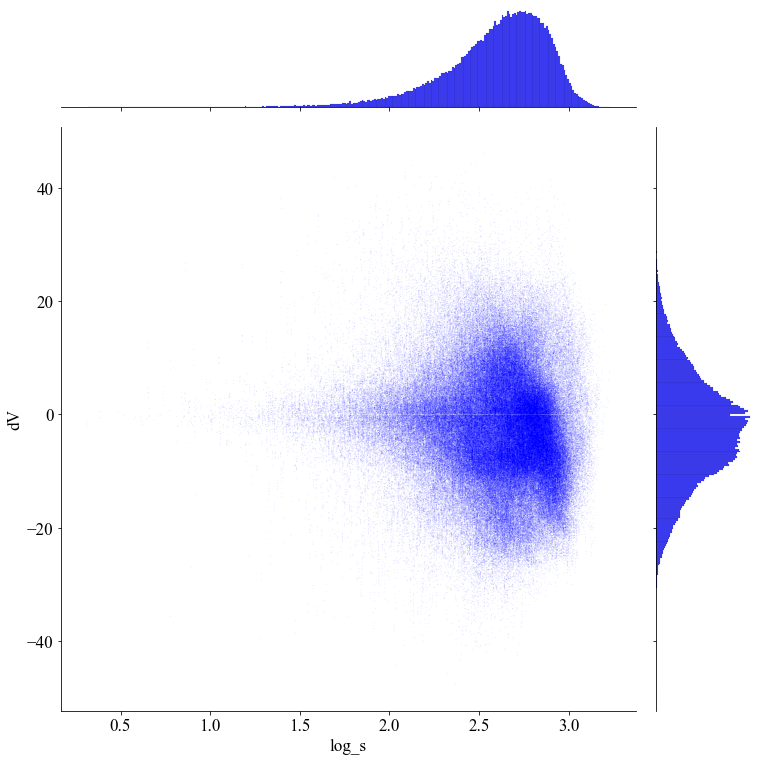

In [65]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

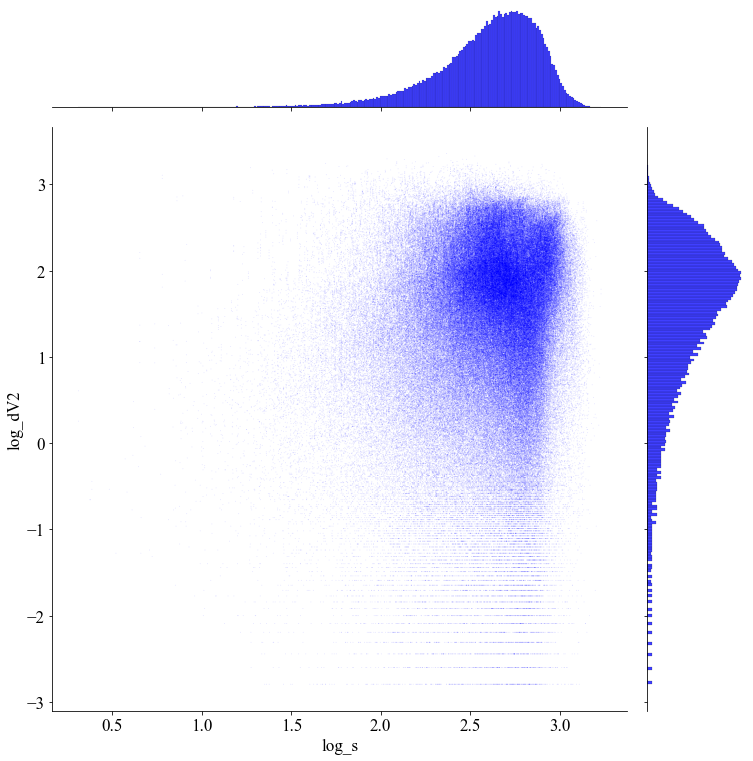

In [66]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.1, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [67]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [68]:
pairs.s_class[pairs.s_class == 0] = 1

In [69]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
              dV2      log_s
count   33.000000  33.000000
mean    12.979776   0.524954
std     36.179347   0.306120
min      0.022500  -0.673709
25%      0.220900   0.484991
50%      0.921600   0.647798
75%      8.526400   0.660887
max    162.052900   0.738386

s_class = 2
               dV2       log_s
count   394.000000  394.000000
mean     28.781124    1.086738
std     122.472824    0.122112
min       0.000100    0.771166
25%       0.490000    1.006651
50%       2.576050    1.109504
75%       9.672400    1.195147
max    1274.490000    1.247894

s_class = 3
               dV2        log_s
count  4424.000000  4424.000000
mean     44.311231     1.586880
std     133.265883     0.127009
min       0.000000     1.250281
25%       1.188100     1.497525
50%       5.856400     1.616207
75%      24.206400    

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


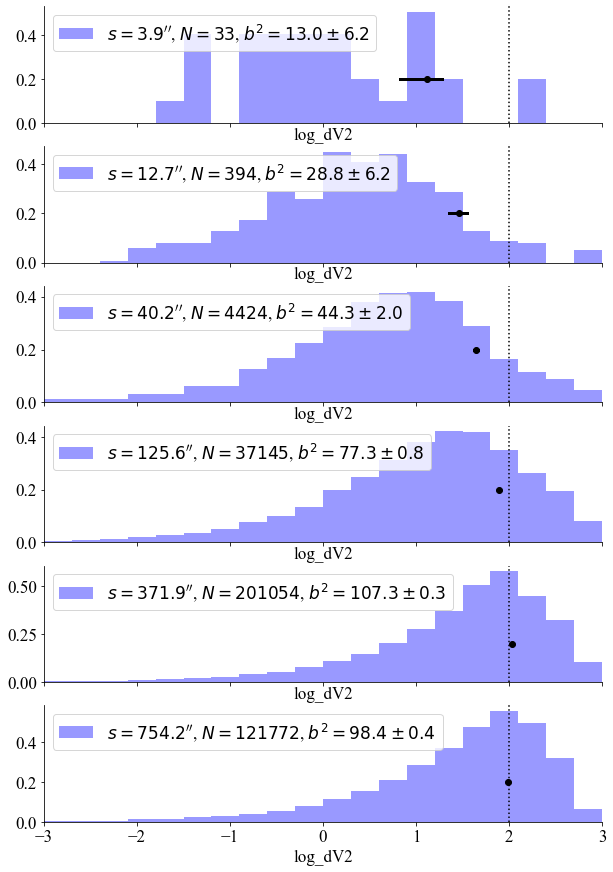

In [70]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [71]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 100.26


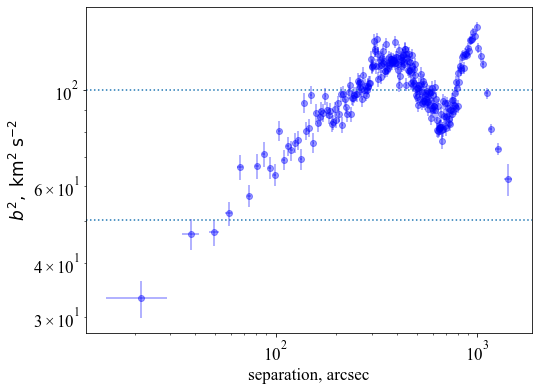

In [72]:
ngroup = 1500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [73]:
d_log_s = 0.2
#log_s_min = np.min(pairs["log_s"])
log_s_min = 1.0
ils = ((pairs["log_s"] - log_s_min) / d_log_s).astype(int).rename("ils")
ils[ils < 0] = 0
ils

0    1       8
     2       8
     3       8
     4       9
     5      10
            ..
865  853     7
     856     6
     857     6
     858     7
     859     7
Name: ils, Length: 364822, dtype: int64

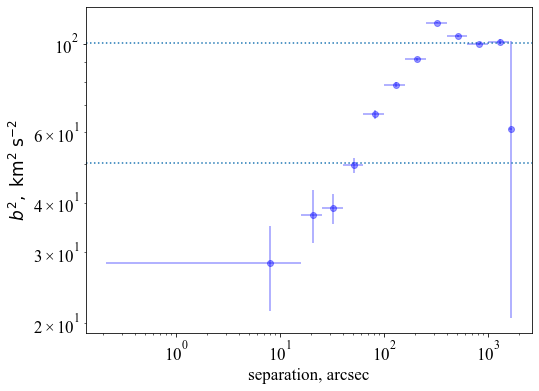

In [74]:
table = pairs[['s', 'dV2']].groupby(ils).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [77]:
table=[s*pc1,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//CarR2.csv',mode = 'w', index=False)

Combined

In [78]:
df4 = dfHa[['RAdeg', 'DEdeg', 'V_mean']].copy()
df4.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'V_mean' : 'RV'}, inplace = True)
df4

X         Y         RV
0    160.9408 -59.51381  -7.175543
1    161.2433 -59.55172  -7.391660
2    161.2100 -59.59631  -9.893945
3    161.1413 -59.58192 -22.703236
4    161.3221 -59.70569 -12.487097
..        ...       ...        ...
861  160.9409 -59.55744  -6.430415
862  160.9275 -59.54794  -8.695479
863  160.8832 -59.56567  -8.319904
864  160.9601 -59.56681  -9.309055
865  161.1662 -59.63503  -9.001914

[855 rows x 3 columns]

In [79]:
df1 = pd.DataFrame(
    {'RA': dfHa.RAdeg, 'DE': dfHa.DEdeg, 'V':vHa, '_key': 1}
)

In [80]:
df1.describe()

RA          DE           V   _key
count  855.000000  855.000000  855.000000  855.0
mean   161.162622  -59.654128   -8.830675    1.0
std      0.132337    0.080008    4.229329    0.0
min    160.768700  -59.891890  -22.703236    1.0
25%    161.068450  -59.712000  -11.433731    1.0
50%    161.157600  -59.658080   -8.695479    1.0
75%    161.267100  -59.589670   -5.994656    1.0
max    161.472400  -59.494310    2.921228    1.0

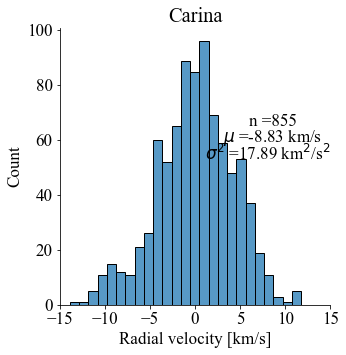

In [81]:
#fig, ax = plt.subplots()

sns.displot(df1.V-df1.V.mean(),bins=25)
plt.xlim(-15,15)


plt.text(0.45, 0.55,'n ='+str(df1.V.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.50,'$μ$ ='+str(np.round(df1.V.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.44, 0.45,'$σ^{2}$ ='+str(np.round(df1.V.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Carina')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="13"

plt.xlabel('Radial velocity [km/s]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.savefig('Hist//Car.pdf', bbox_inches='tight')

In [82]:
df2 = df1.copy()

In [83]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

In [84]:
pairs.head()

RA        DE         V       RA_       DE_         V_
0 0  160.9408 -59.51381 -7.175543  160.9408 -59.51381  -7.175543
  1  160.9408 -59.51381 -7.175543  161.2433 -59.55172  -7.391660
  2  160.9408 -59.51381 -7.175543  161.2100 -59.59631  -9.893945
  3  160.9408 -59.51381 -7.175543  161.1413 -59.58192 -22.703236
  4  160.9408 -59.51381 -7.175543  161.3221 -59.70569 -12.487097

In [85]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
pairs = pairs[(pairs.dDE > 0.0)]

In [87]:
pairs.head()

RA        DE         V       RA_       DE_         V_      dDE  \
0 1  160.9408 -59.51381 -7.175543  161.2433 -59.55172  -7.391660  136.476   
  2  160.9408 -59.51381 -7.175543  161.2100 -59.59631  -9.893945  297.000   
  3  160.9408 -59.51381 -7.175543  161.1413 -59.58192 -22.703236  245.196   
  4  160.9408 -59.51381 -7.175543  161.3221 -59.70569 -12.487097  690.768   
  5  160.9408 -59.51381 -7.175543  161.3321 -59.76122 -12.903563  890.676   

            dRA            s     log_s         dV         dV2   log_dV2  \
0 1 -552.172605   568.788436  2.754951   0.216116    0.046706 -1.330626   
  2 -491.062913   573.891788  2.758830   2.718401    7.389704  0.868627   
  3 -365.821506   440.393520  2.643841  15.527692  241.109225  2.382214   
  4 -694.420944   979.479901  2.990996   5.311553   28.212598  1.450443   
  5 -712.043953  1140.311505  3.057024   5.728020   32.810209  1.516009   

       VV_mean  
0 1  -7.283602  
  2  -8.534744  
  3 -14.939390  
  4  -9.831320  
  5 -10.039553

In [88]:
pairs.describe()

RA             DE              V            RA_  \
count  364822.000000  364822.000000  364822.000000  364822.000000   
mean      161.147930     -59.608620      -8.261748     161.177299   
std         0.139652       0.064388       4.352505       0.122715   
min       160.768700     -59.885500     -22.703236     160.768700   
25%       161.029800     -59.658080     -10.695276     161.095500   
50%       161.136100     -59.605140      -8.095490     161.174200   
75%       161.266300     -59.555830      -5.173047     161.271300   
max       161.472400     -59.494310       2.921228     161.472400   

                 DE_             V_            dDE            dRA  \
count  364822.000000  364822.000000  364822.000000  364822.000000   
mean      -59.699642      -9.398921     327.681923     -53.545434   
std         0.067106       4.017613     242.207180     336.339063   
min       -59.891890     -22.703236       0.072000   -1232.407354   
25%       -59.737310     -11.973646     131.184000    -291.428857   
50%       -59.704140      -9.299512     281.412000     -56.244477   
75%       -59.658080      -6.864259     480.204000     179.184622   
max       -59.494720       2.921228    1431.288000    1280.427149   

                   s          log_s             dV           dV2  \
count  364822.000000  364822.000000  364822.000000  3.648220e+05   
mean      469.992534       2.595859       1.137172  3.579764e+01   
std       247.260094       0.286951       5.874060  5.106843e+01   
min         0.211978      -0.673709     -25.624463  3.801128e-11   
25%       280.941624       2.448616      -2.704643  3.500504e+00   
50%       442.651348       2.646062       1.208930  1.589232e+01   
75%       634.346386       2.802326       5.034221  4.680141e+01   
max      1693.387954       3.228756      25.288449  6.566131e+02   

             log_dV2        VV_mean  
count  364822.000000  364822.000000  
mean        0.993286      -8.830335  
std         0.969954       2.986069  
min       -10.420088     -21.733959  
25%         0.544131     -10.768199  
50%         1.201187      -8.734476  
75%         1.670259      -6.780772  
max         2.817310       2.753221

In [89]:
pairs.corr()

RA        DE         V       RA_       DE_        V_       dDE  \
RA       1.000000 -0.317070 -0.063820  0.010986 -0.141523 -0.015069 -0.162283   
DE      -0.317070  1.000000  0.416325 -0.000495  0.477044 -0.003610  0.481199   
V       -0.063820  0.416325  1.000000 -0.015106  0.179423  0.016611  0.219469   
RA_      0.010986 -0.000495 -0.015106  1.000000  0.073618 -0.108706 -0.073901   
DE_     -0.141523  0.477044  0.179423  0.073618  1.000000 -0.050105 -0.540883   
V_      -0.015069 -0.003610  0.016611 -0.108706 -0.050105  1.000000  0.046521   
dDE     -0.162283  0.481199  0.219469 -0.073901 -0.540883  0.046521  1.000000   
dRA      0.748079 -0.239213 -0.038242 -0.655349 -0.155640  0.060524 -0.073692   
s       -0.194392  0.447700  0.187277  0.000103 -0.381572  0.048319  0.809042   
log_s   -0.156970  0.414585  0.166392  0.020902 -0.317697  0.020776  0.713640   
dV      -0.036982  0.310954  0.729609  0.063157  0.167217 -0.671650  0.130801   
dV2      0.066698  0.063046  0.065400  0.009377  0.033545 -0.255606  0.026878   
log_dV2  0.059385  0.043548  0.053367  0.020965  0.013346 -0.176767  0.028364   
VV_mean -0.056650  0.300990  0.739976 -0.084139  0.097057  0.684832  0.191245   

              dRA         s     log_s        dV       dV2   log_dV2   VV_mean  
RA       0.748079 -0.194392 -0.156970 -0.036982  0.066698  0.059385 -0.056650  
DE      -0.239213  0.447700  0.414585  0.310954  0.063046  0.043548  0.300990  
V       -0.038242  0.187277  0.166392  0.729609  0.065400  0.053367  0.739976  
RA_     -0.655349  0.000103  0.020902  0.063157  0.009377  0.020965 -0.084139  
DE_     -0.155640 -0.381572 -0.317697  0.167217  0.033545  0.013346  0.097057  
V_       0.060524  0.048319  0.020776 -0.671650 -0.255606 -0.176767  0.684832  
dDE     -0.073692  0.809042  0.713640  0.130801  0.026878  0.028364  0.191245  
dRA      1.000000 -0.147257 -0.132739 -0.069732  0.044092  0.030889  0.012845  
s       -0.147257  1.000000  0.915768  0.105719 -0.007820  0.014276  0.168993  
log_s   -0.132739  0.915768  1.000000  0.109082  0.020337  0.039996  0.135243  
dV      -0.069732  0.105719  0.109082  1.000000  0.223283  0.160444  0.079904  
dV2      0.044092 -0.007820  0.020337  0.223283  1.000000  0.638108 -0.124289  
log_dV2  0.030889  0.014276  0.039996  0.160444  0.638108  1.000000 -0.080022  
VV_mean  0.012845  0.168993  0.135243  0.079904 -0.124289 -0.080022  1.000000

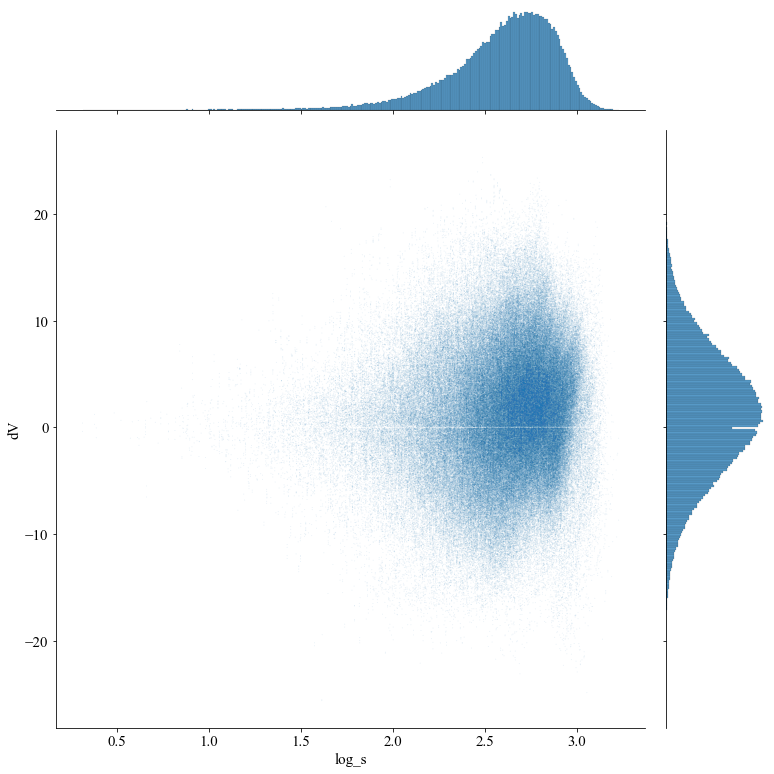

In [91]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.1, s=1, edgecolor='none')
ax.fig.set_size_inches(12, 12)

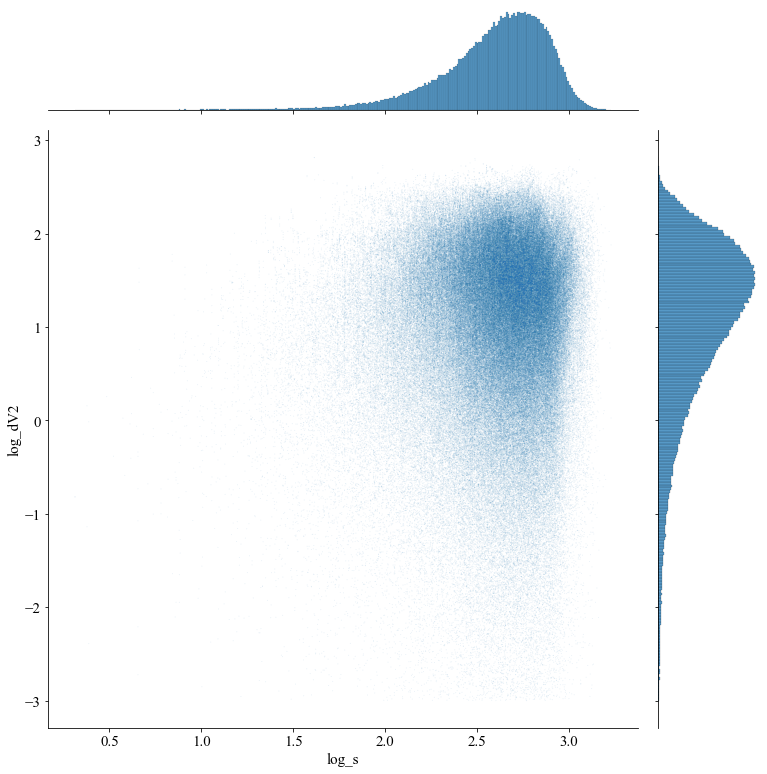

In [92]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.1, s=1, edgecolor='none')
ax.fig.set_size_inches(12, 12)

In [93]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [94]:
pairs.s_class[pairs.s_class == 0] = 1

In [95]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  33.000000  33.000000
mean    3.027535   0.524954
std     8.850006   0.306120
min     0.001895  -0.673709
25%     0.185868   0.484991
50%     0.459572   0.647798
75%     1.183969   0.660887
max    42.751875   0.738386

s_class = 2
              dV2       log_s
count  394.000000  394.000000
mean     7.343047    1.086738
std     11.350682    0.122112
min      0.000029    0.771166
25%      0.532804    1.006651
50%      2.910290    1.109504
75%      8.710876    1.195147
max    101.235758    1.247894

s_class = 3
                dV2        log_s
count  4.424000e+03  4424.000000
mean   1.537716e+01     1.586880
std    3.260059e+01     0.127009
min    2.558189e-07     1.250281
25%    9.660336e-01     1.497525
50%    4.832960e+00     1.616207
75%    1.592117e+01     1.694222


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


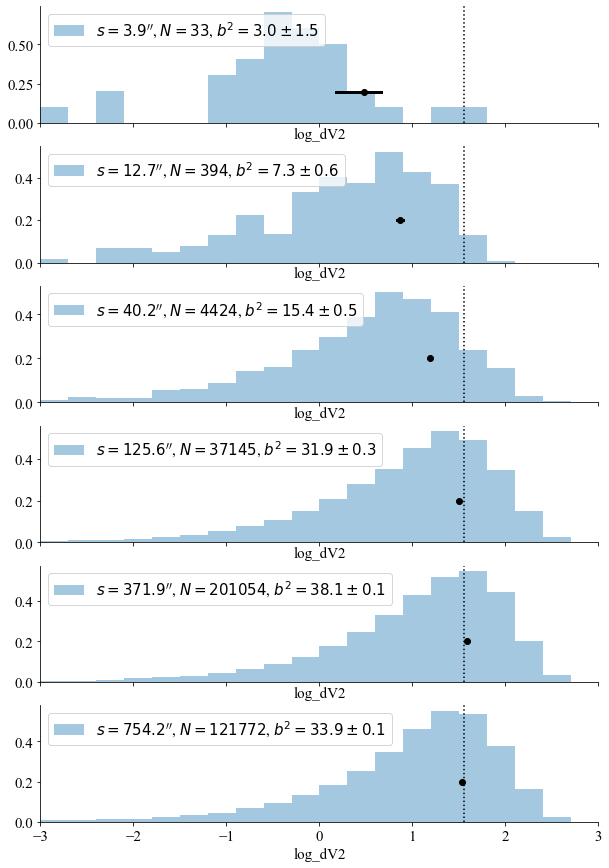

In [96]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [97]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 35.73


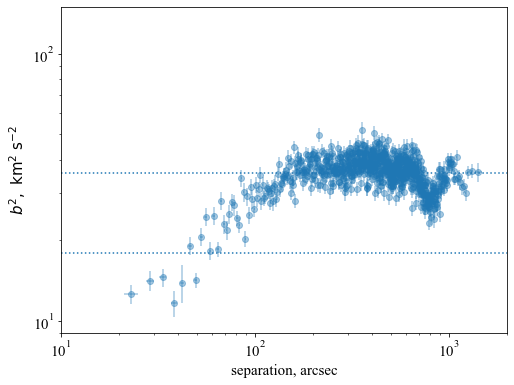

In [98]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4)
ax.set(xscale='log', yscale='log', 
       xlim=[10.0, 2000.0], ylim=[9.0, 150.0],
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [99]:
d_log_s = 0.2
#log_s_min = np.min(pairs["log_s"])
log_s_min = 1.0
ils = ((pairs["log_s"] - log_s_min) / d_log_s).astype(int).rename("ils")
ils[ils < 0] = 0
ils

0    1       8
     2       8
     3       8
     4       9
     5      10
            ..
865  853     7
     856     6
     857     6
     858     7
     859     7
Name: ils, Length: 364822, dtype: int64

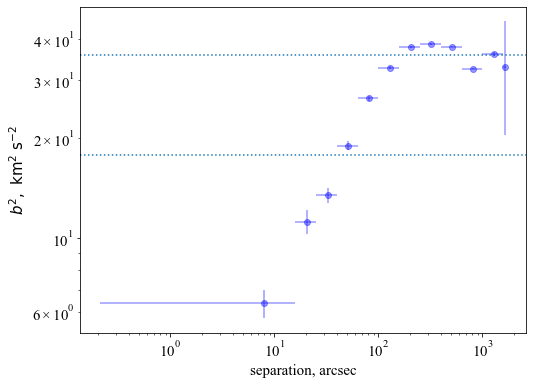

In [88]:
table = pairs[['s', 'dV2']].groupby(ils).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
#sgrid = np.logspace(1.0, 3.0)
#ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [89]:
df1.V.std()

4.229328754608083

In [102]:
table=[s*pc1,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//Car2.csv',mode = 'w', index=False)

In [103]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 1617.8264520168304 seconds ---
